# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import keras

In [3]:
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Miguel Angel\\.keras\\datasets\\auto-mpg.data'

In [10]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

Importelo usando pandas.

In [11]:
df = pd.read_csv(dataset_path, names=column_names, delim_whitespace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Limpia los datos

Trata los missings y variables categóricas

In [15]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [21]:
df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [22]:
df['Horsepower_new'] = np.where(df['Horsepower']=='?', np.nan, df['Horsepower'])
df['Horsepower_new'] = df['Horsepower_new'].astype(float)
df['Horsepower_new'].mean()

104.46938775510205

In [24]:
df['Horsepower_new'].min()

46.0

In [25]:
df['Horsepower_new'] = df['Horsepower_new'].fillna(np.mean(df['Horsepower_new']))

In [26]:
df['Car Name'].str.contains("ford")

0      False
1      False
2      False
3      False
4       True
       ...  
393     True
394    False
395    False
396     True
397    False
Name: Car Name, Length: 398, dtype: bool

In [27]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [36]:
df[df['Origin']==3]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name,Horsepower_new
14,24.0,4,113.0,95.00,2372.0,15.0,70,3,toyota corona mark ii,95.0
18,27.0,4,97.0,88.00,2130.0,14.5,70,3,datsun pl510,88.0
29,27.0,4,97.0,88.00,2130.0,14.5,71,3,datsun pl510,88.0
31,25.0,4,113.0,95.00,2228.0,14.0,71,3,toyota corona,95.0
53,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200,65.0
...,...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.00,2245.0,16.9,82,3,toyota corolla,70.0
383,38.0,4,91.0,67.00,1965.0,15.0,82,3,honda civic,67.0
384,32.0,4,91.0,67.00,1965.0,15.7,82,3,honda civic (auto),67.0
385,38.0,4,91.0,67.00,1995.0,16.2,82,3,datsun 310 gx,67.0


In [37]:
df['USA'] = np.where(df['Origin']==1, 1, 0)
df['Europe'] = np.where(df['Origin']==2, 1, 0)
df['Japan'] = np.where(df['Origin']==3, 1, 0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name,Horsepower_new,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,130.0,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,165.0,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,150.0,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,150.0,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,140.0,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [38]:
df.drop(columns=['Horsepower','Origin', "Car Name"], inplace=True)

In [39]:
train = df.sample(frac=0.8, random_state=10)
test = df.drop(train.index)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [41]:
train.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration',
       'Model Year', 'Horsepower_new', 'USA', 'Europe', 'Japan'],
      dtype='object')

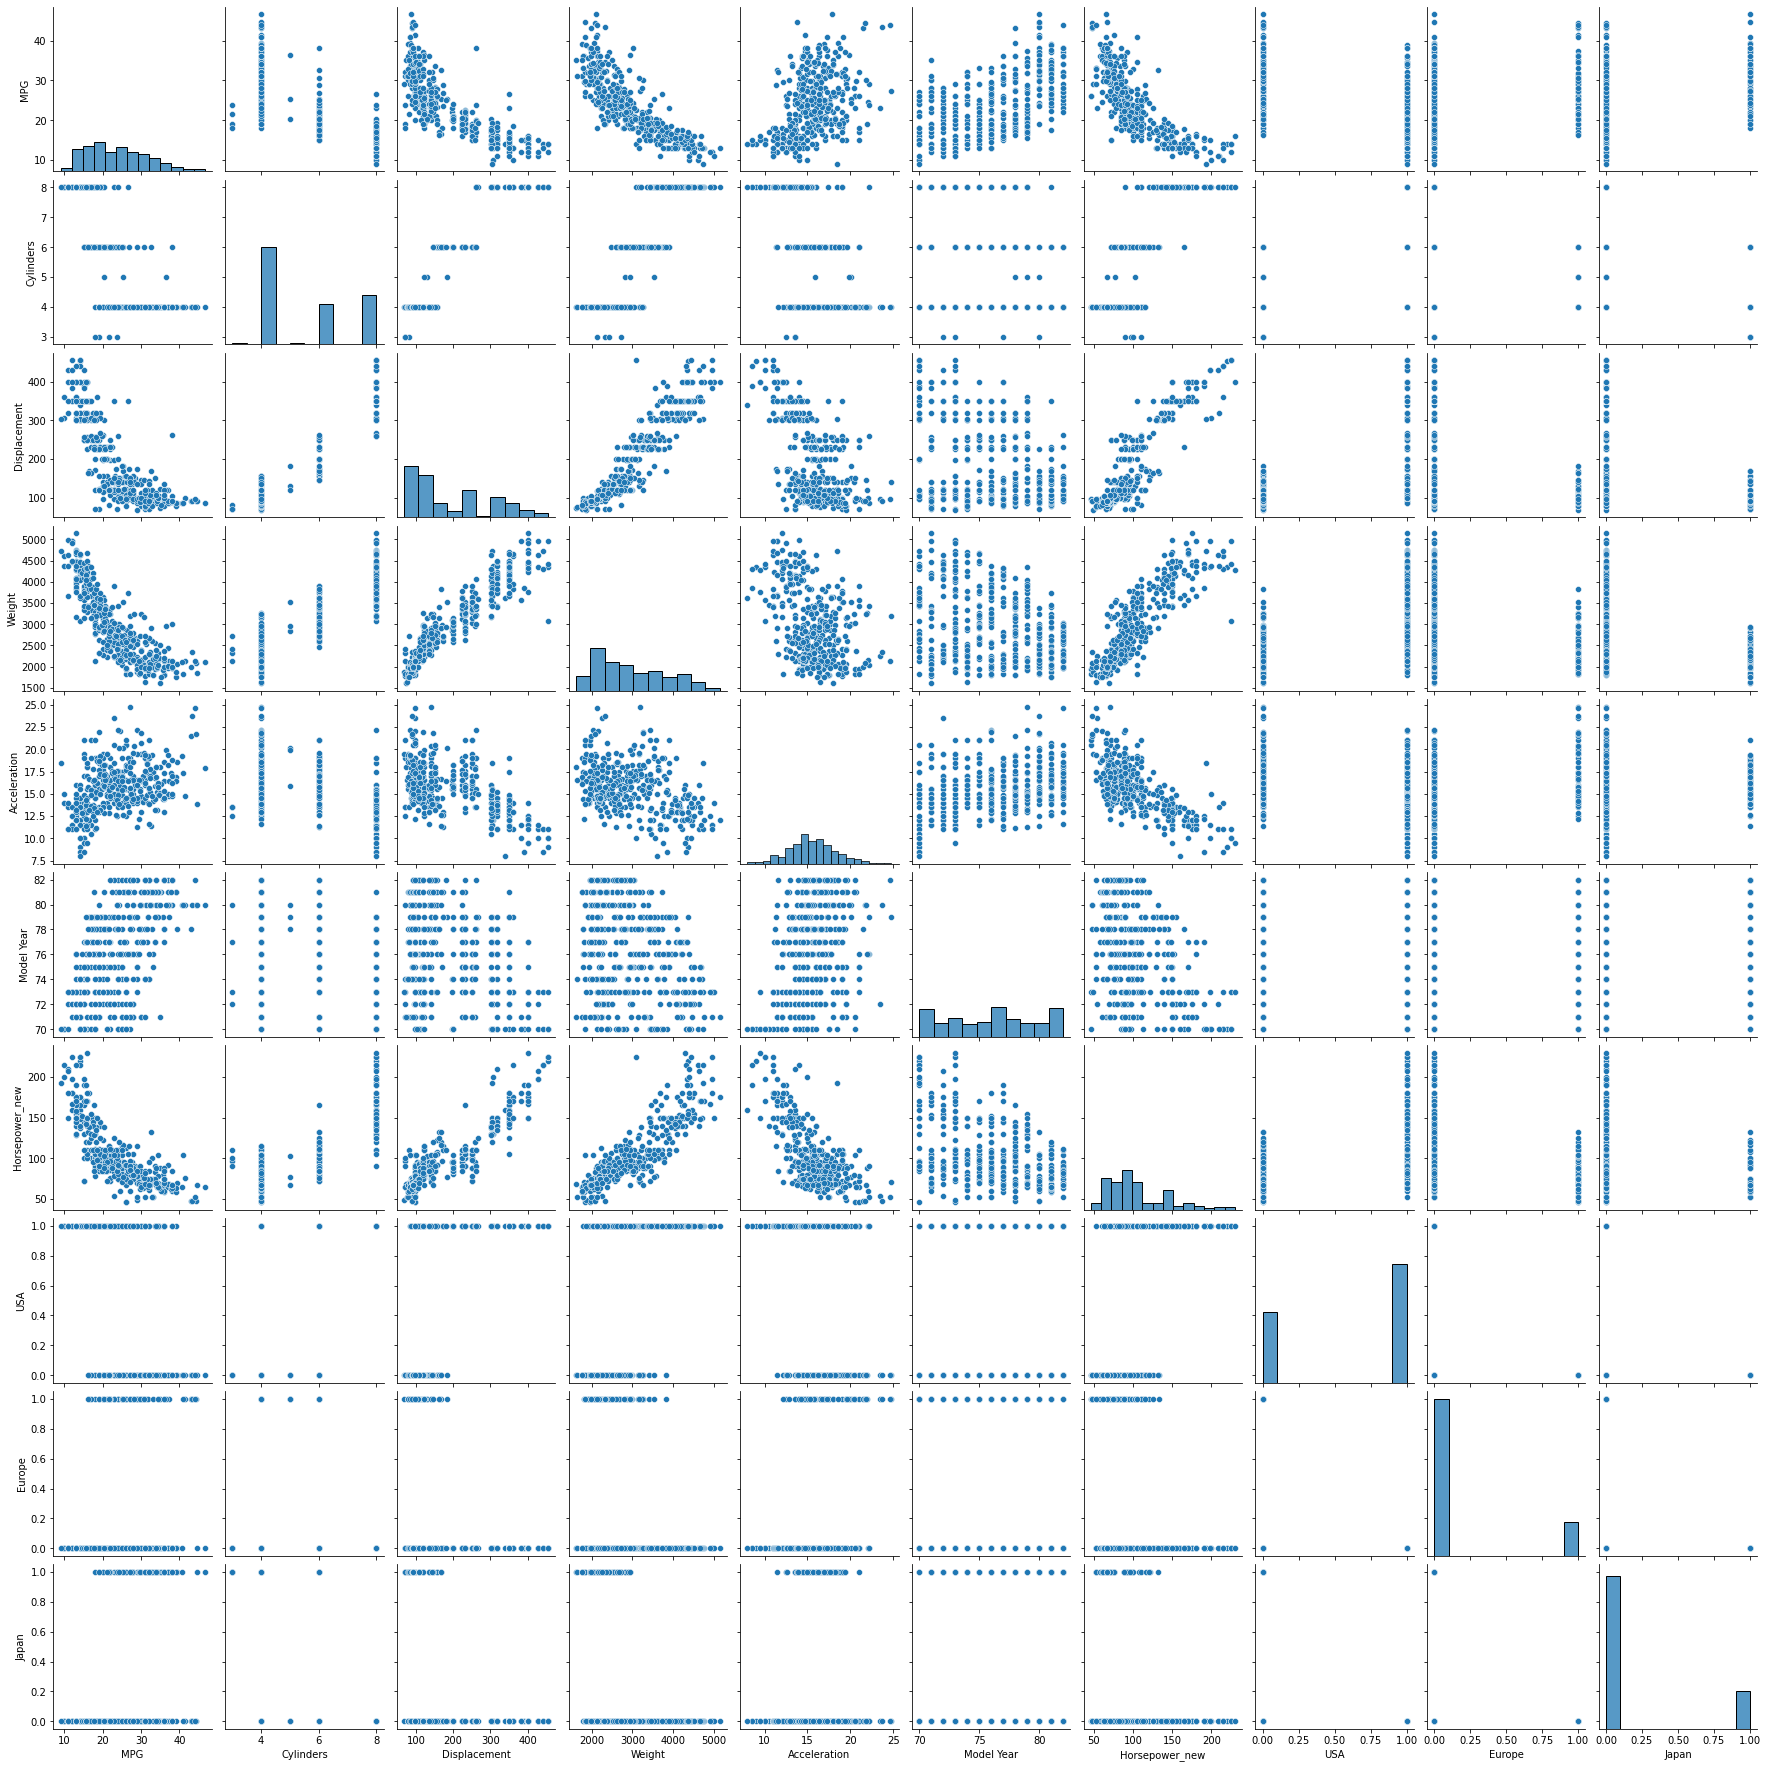

In [42]:
sns.pairplot(df)

Tambien revise las estadisticas generales:

In [43]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Horsepower_new,USA,Europe,Japan
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,104.469388,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,38.199187,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,46.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,76.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,95.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,125.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,230.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

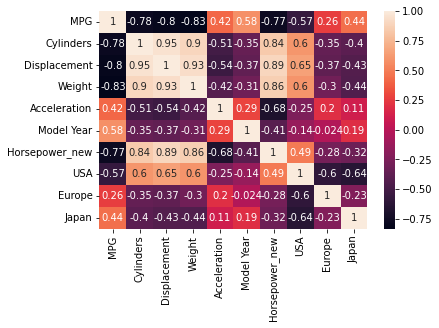

In [44]:
sns.heatmap(df.corr(), annot=True)

### Separa las features del target

Separe el target de las features.

In [45]:
X_train = train.drop(columns='MPG')
X_test = test.drop(columns='MPG')

y_train = train['MPG']
y_test = test['MPG']

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 9)
(80, 9)
(318,)
(80,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [50]:
X_train_scal.shape[1:]

(9,)

In [56]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scal.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model.compile(loss='mse', optimizer=keras.optimizers.RMSprop(0.001), metrics=['mse','mae'])

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [53]:
9 * 64 + 64

640

In [54]:
64 * 32 + 32

2080

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [57]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

history_1 = model.fit(X_train_scal, y_train, epochs=1000, validation_split=0.2,
                   callbacks = [early_stopping_cb])

Epoch 1/1000
8/8 [==============================] - 1s 22ms/step - loss: 565.3896 - mse: 565.3896 - mae: 22.5322 - val_loss: 616.8986 - val_mse: 616.8986 - val_mae: 23.3093
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 534.2991 - mse: 534.2991 - mae: 21.8225 - val_loss: 582.5514 - val_mse: 582.5514 - val_mae: 22.5644
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 501.4718 - mse: 501.4718 - mae: 21.0687 - val_loss: 542.5076 - val_mse: 542.5076 - val_mae: 21.6880
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 462.8928 - mse: 462.8928 - mae: 20.1800 - val_loss: 495.7650 - val_mse: 495.7650 - val_mae: 20.6391
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 419.7440 - mse: 419.7440 - mae: 19.1241 - val_loss: 444.7799 - val_mse: 444.7799 - val_mae: 19.4323
Epoch 6/1000
8/8 [==============================] - 0s 17ms/step - loss: 373.6313 - mse: 373.6313 - mae: 17.9453 - val_loss: 391.8261 - val

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [58]:
history_1.history

{'loss': [565.3895874023438,
  534.2991333007812,
  501.4718322753906,
  462.892822265625,
  419.7439880371094,
  373.63134765625,
  325.55364990234375,
  277.0184631347656,
  230.18846130371094,
  185.317626953125,
  143.69091796875,
  108.2288589477539,
  80.06700897216797,
  59.01405715942383,
  44.91547393798828,
  35.36934280395508,
  28.794340133666992,
  24.248186111450195,
  20.940610885620117,
  18.20220947265625,
  16.28996467590332,
  14.799704551696777,
  13.468893051147461,
  12.367786407470703,
  11.42880630493164,
  10.791778564453125,
  10.1011381149292,
  9.774561882019043,
  9.462202072143555,
  8.832930564880371,
  8.876880645751953,
  8.461165428161621,
  8.139398574829102,
  8.061666488647461,
  7.8598504066467285,
  7.733728885650635,
  7.533848762512207,
  7.527492523193359,
  7.358423233032227,
  7.339287757873535,
  7.215735912322998,
  7.15227746963501,
  7.173613548278809,
  6.938441276550293,
  6.9777960777282715,
  6.94102144241333,
  6.828243732452393,
  6

<AxesSubplot:>

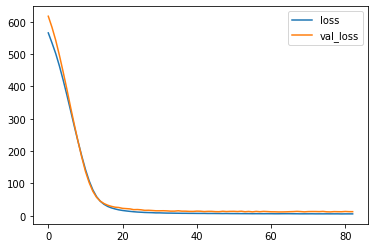

In [60]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()

¿Alguna conclusión respecto a este gráfico?

Earlystopping TOP para prevenir overfitting, pero también para detener y ahorrar recursos (tiempo, procesamiento...) innecesarios en el entrenamiento

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [62]:
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scal.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

model_2.compile(loss='mse', optimizer=keras.optimizers.RMSprop(0.001), metrics=['mse','mae'])


early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history_2 = model_2.fit(X_train_scal, y_train, epochs=1000, validation_split=0.2,
                   callbacks = [early_stopping_cb])

Epoch 1/1000
8/8 [==============================] - 1s 26ms/step - loss: 574.7845 - mse: 574.7845 - mae: 22.7754 - val_loss: 619.0062 - val_mse: 619.0062 - val_mae: 23.3873
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 534.0683 - mse: 534.0683 - mae: 21.8725 - val_loss: 579.1570 - val_mse: 579.1570 - val_mae: 22.5282
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 496.7361 - mse: 496.7361 - mae: 21.0133 - val_loss: 535.6657 - val_mse: 535.6657 - val_mae: 21.5626
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 455.7080 - mse: 455.7080 - mae: 20.0440 - val_loss: 487.6523 - val_mse: 487.6523 - val_mae: 20.4550
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 411.7575 - mse: 411.7575 - mae: 18.9421 - val_loss: 437.1299 - val_mse: 437.1299 - val_mae: 19.2262
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 366.1207 - mse: 366.1207 - mae: 17.7436 - val_loss: 384.6107 - val_

Interpreta el gráfico

<AxesSubplot:>

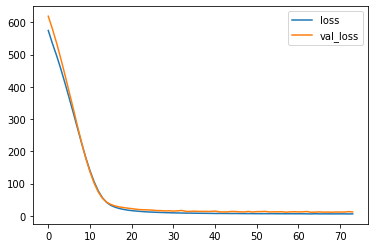

In [64]:
pd.DataFrame(history_2.history)[['loss','val_loss']].plot()

Observamos que el entrenamiento a pesar de tener 1000 epochs ha sido detenido debido a que el error en validación ya no conseguía una mejora y por lo tanto evitamos un posible overfitting.

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [66]:
model.evaluate(X_test_scal, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 4.8614 - mse: 4.8614 - mae: 1.7158


[4.861425399780273, 4.861425399780273, 1.7158170938491821]

In [65]:
model_2.evaluate(X_test_scal, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 5.2206 - mse: 5.2206 - mae: 1.7585


[5.220605850219727, 5.220605850219727, 1.758462905883789]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [70]:
model.predict(X_test_scal[:10])

array([[17.900589],
       [13.305092],
       [18.191645],
       [14.861158],
       [20.716825],
       [20.69146 ],
       [23.759962],
       [22.411137],
       [21.67355 ],
       [13.094431]], dtype=float32)

In [71]:
model.save("trained_model.h5")

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [75]:
y_pred = model.predict(X_test_scal).flatten()
y_pred

array([17.900589 , 13.305092 , 18.191645 , 14.861158 , 20.716825 ,
       20.69146  , 23.759962 , 22.411137 , 21.67355  , 13.094431 ,
       12.866682 , 29.409208 , 13.416155 , 23.592627 , 14.909377 ,
       13.297916 , 22.429766 , 12.442554 , 14.314081 , 13.081114 ,
       12.472662 , 22.840761 , 25.702042 , 20.814848 , 16.229532 ,
       19.244917 , 16.633062 , 15.685577 , 16.983128 , 13.1883545,
       25.756239 , 26.253283 , 30.371515 , 23.745293 , 13.676379 ,
       13.5928955, 22.676435 , 20.929262 , 25.818316 , 18.644922 ,
       31.961725 , 31.642134 , 31.827602 , 16.340937 , 23.110266 ,
       31.398008 , 23.44242  , 35.421173 , 34.16603  , 17.102535 ,
       19.182335 , 16.514462 , 26.660917 , 21.831774 , 20.147043 ,
       19.45719  , 18.861567 , 16.889061 , 17.29042  , 17.173677 ,
       26.650015 , 25.303782 , 28.73208  , 31.505293 , 32.238907 ,
       38.187164 , 36.62278  , 36.119095 , 32.848553 , 32.704475 ,
       21.48524  , 29.949194 , 29.743555 , 36.943592 , 32.8003

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

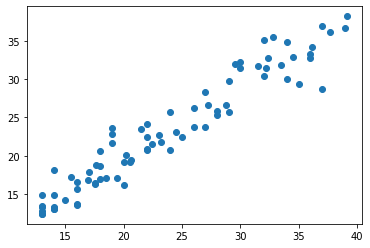

In [76]:
plt.scatter(y_test, y_pred)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

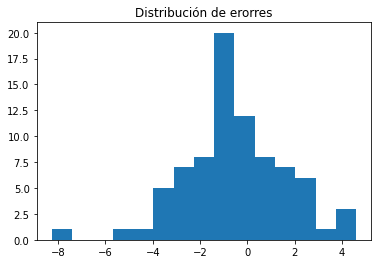

In [79]:
error = y_pred - y_test
plt.hist(error, bins=15)
plt.title("Distribución de erorres");

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.